In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv('matches.csv')

In [22]:
# Show the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers 


First 5 rows:
                                title_x    imdb_id  \
0              Uri: The Surgical Strike  tt8291224   
1                         Battalion 609  tt9472208   
2  The Accidental Prime Minister (film)  tt6986710   
3                       Why Cheat India  tt8108208   
4                       Evening Shadows  tt6028796   

                                         poster_path  \
0  https://upload.wikimedia.org/wikipedia/en/thum...   
1                                                NaN   
2  https://upload.wikimedia.org/wikipedia/en/thum...   
3  https://upload.wikimedia.org/wikipedia/en/thum...   
4                                                NaN   

                                           wiki_link  \
0  https://en.wikipedia.org/wiki/Uri:_The_Surgica...   
1        https://en.wikipedia.org/wiki/Battalion_609   
2  https://en.wikipedia.org/wiki/The_Accidental_P...   
3      https://en.wikipedia.org/wiki/Why_Cheat_India   
4      https://en.wikipedia.org/wiki/Evenin

In [23]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  u

In [25]:
# Null values check
print("\n Null Values:")
print(df.isnull().sum())


 Null Values:
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64


In [26]:
# Basic stats
print("\n Match count by season:")
print(df['season'].value_counts().sort_index())


 Match count by season:
season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: count, dtype: int64


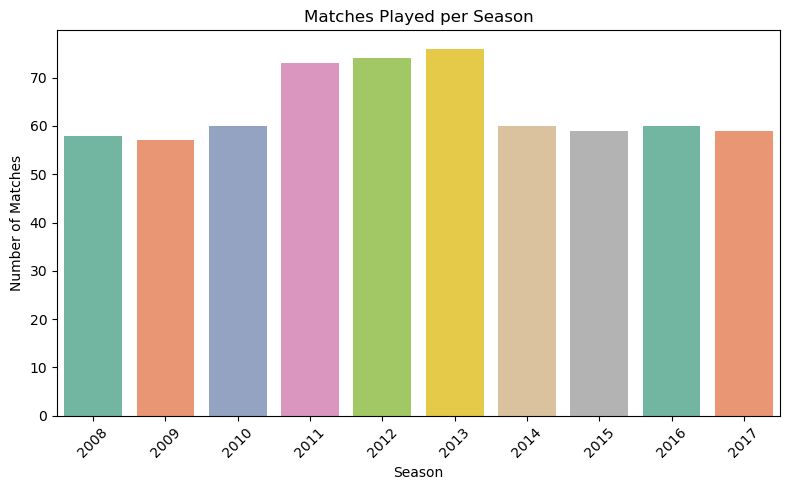

In [27]:
# Plot: Number of matches per season
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='season', palette='Set2')
plt.title("Matches Played per Season")
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()


 Most Wins:
winner
Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64


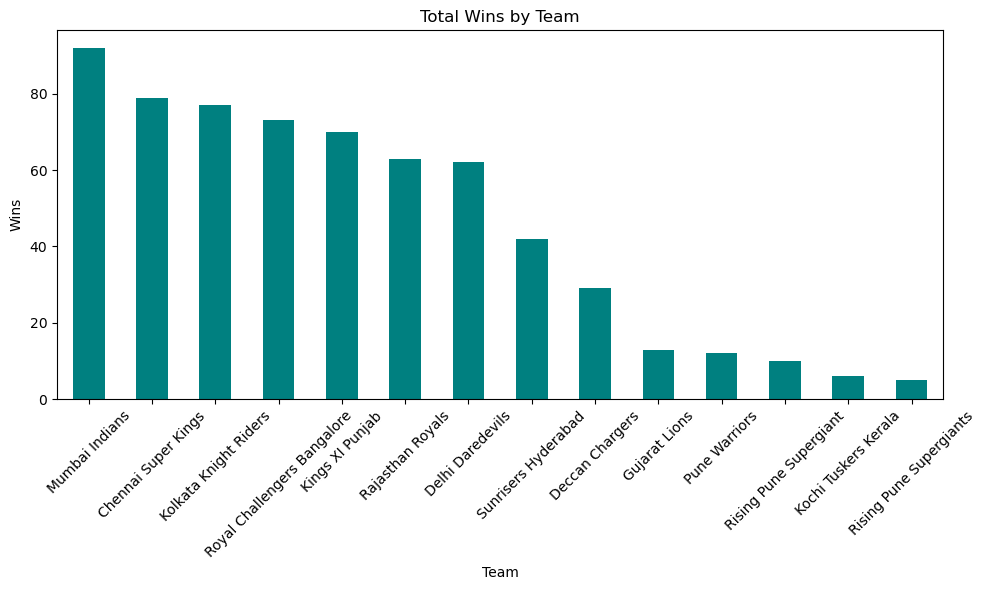

In [28]:
# Most successful teams
print("\n Most Wins:")
print(df['winner'].value_counts())

plt.figure(figsize=(10, 6))
df['winner'].value_counts().plot(kind='bar', color='teal')
plt.title("Total Wins by Team")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

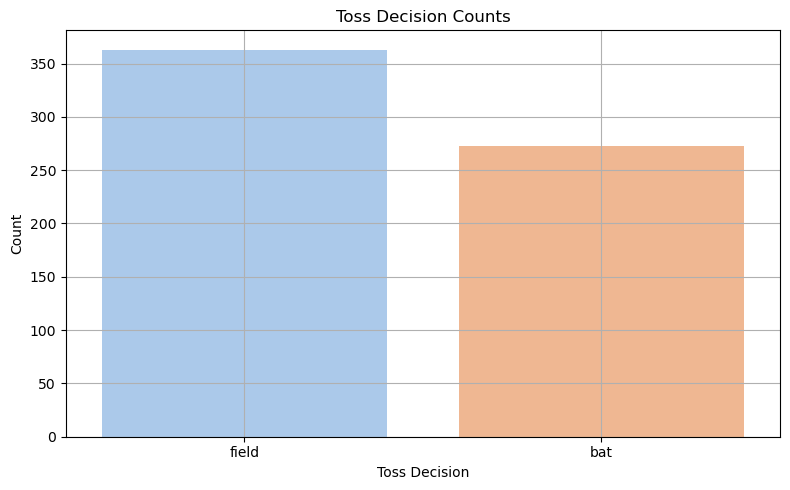

In [29]:
# Toss decision analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='toss_decision', palette='pastel')
plt.title("Toss Decision Counts")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Toss winner vs Match winner
toss_match_win = df[df['toss_winner'] == df['winner']]
toss_match_win_ratio = len(toss_match_win) / len(df)
print(f"\n Percentage of matches where Toss Winner also won the match: {toss_match_win_ratio:.2%}")


 Percentage of matches where Toss Winner also won the match: 51.10%


In [31]:
# Top players
top_players = df['player_of_match'].value_counts().head(10)
print("\n Top 10 Players of the Match Awards:")
print(top_players)


 Top 10 Players of the Match Awards:
player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: count, dtype: int64


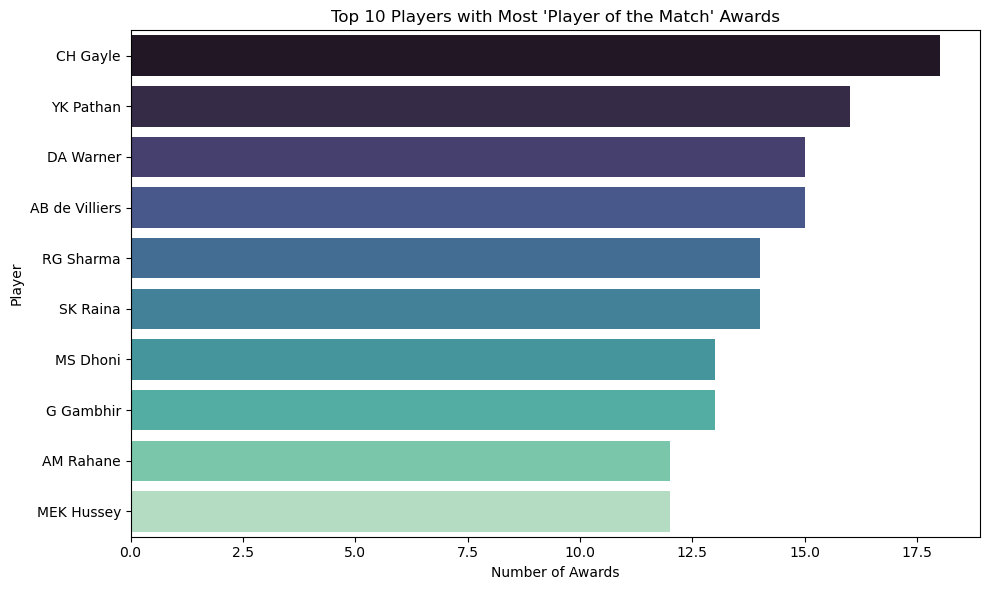

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette='mako')
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()